In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('kr-final-cleaned.csv', low_memory=False);

#region_data = data.loc[(data['region'].isin([region_value]))]

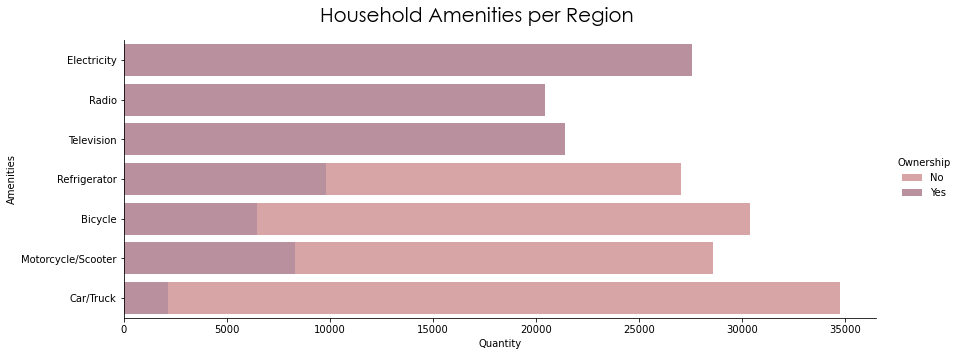

In [21]:
#Household Amenities per Region
amenities = data[['V119','V120','V121','V122','V123','V124','V125']]
variables = {'V119': "Electricity", 'V120': "Radio", 'V121': "Television", 'V122': "Refrigerator", 
     'V123': "Bicycle", 'V124': "Motorcycle/Scooter", 'V125': "Car/Truck"}

amenities = amenities.rename(columns=variables).apply(pd.Series.value_counts)

amenities_reshaped = pd.melt(amenities, var_name="Amenities", value_name="Quantity", ignore_index = False)
amenities_reshaped['Ownership'] = amenities_reshaped.index
amenities_reshaped = amenities_reshaped[amenities_reshaped['Ownership'] != 'Missing']

colors = ['#DF9D9E', '#BF899C']

plot = sns.catplot(x="Quantity", y="Amenities", hue="Ownership", data=amenities_reshaped, 
                   kind='bar', aspect = 2.5, dodge=False, palette=colors)
plot.fig.suptitle("Household Amenities per Region", font="Century Gothic", fontsize=20)
plot.tight_layout()

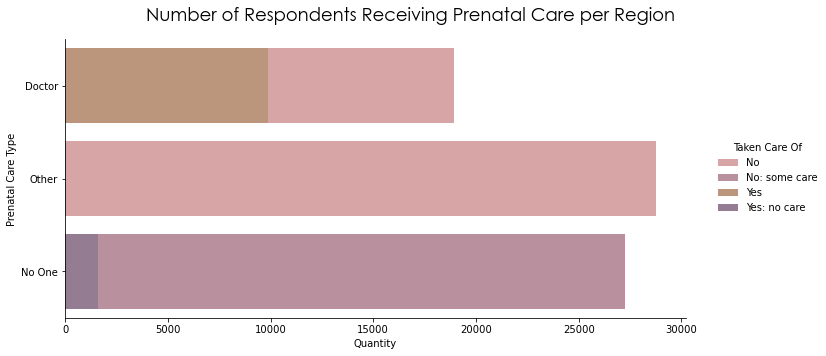

In [20]:
#Number of Respondents Receiving Prenatal Care per Region
prenatal = data[['M2A','M2K','M2N']]
variables = {'M2A': "Doctor", 'M2K': "Other", 'M2N': "No One"}

prenatal = prenatal.rename(columns=variables).apply(pd.Series.value_counts)

prenatal_reshaped = pd.melt(prenatal, var_name="Prenatal Care Type", value_name="Quantity", ignore_index = False)
prenatal_reshaped['Taken Care Of'] = prenatal_reshaped.index
prenatal_reshaped = prenatal_reshaped[(prenatal_reshaped['Taken Care Of'] != 'Missing')]

colors = ['#DF9D9E', '#BF899C', '#C79272', '#987896']

plot = sns.catplot(x="Quantity", y="Prenatal Care Type", hue="Taken Care Of", data=prenatal_reshaped, 
                   kind='bar', aspect = 2, dodge=False, palette=colors)
plot.fig.suptitle("Number of Respondents Receiving Prenatal Care per Region", font="Century Gothic", fontsize=18)
plot.tight_layout()

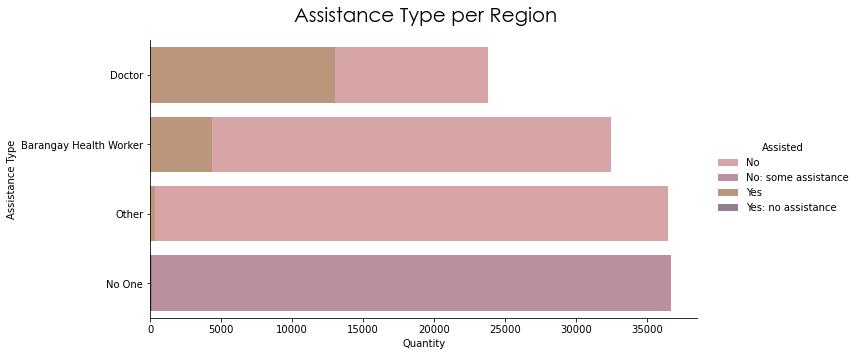

In [19]:
#Assistance Type per Region
assistance = data[['M3A','M3H','M3K','M3N']]
variables = {'M3A': "Doctor", 'M3H': "Barangay Health Worker", 'M3K': "Other", 'M3N': "No One"}

assistance = assistance.rename(columns=variables).apply(pd.Series.value_counts)

assistance_reshaped = pd.melt(assistance, var_name="Assistance Type", value_name="Quantity", ignore_index = False)
assistance_reshaped['Assisted'] = assistance_reshaped.index
assistance_reshaped = assistance_reshaped[(assistance_reshaped['Assisted'] != 'Missing')]

colors = ['#DF9D9E', '#BF899C', '#C79272', '#987896']

plot = sns.catplot(x="Quantity", y="Assistance Type", hue="Assisted", data=assistance_reshaped, 
                   kind='bar', aspect = 2, dodge=False, palette=colors)
plot.fig.suptitle("Assistance Type per Region", font="Century Gothic", fontsize=20)
plot.tight_layout()

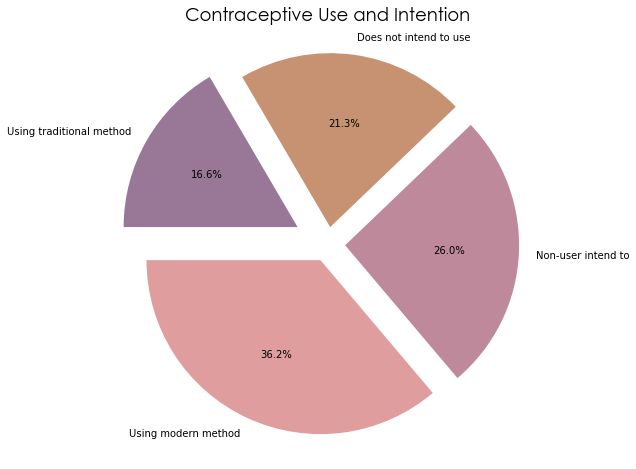

In [29]:
#Contraceptive Use and Intention
explode = (0.1, 0.1, 0.1, 0.2)
colors = ['#DF9D9E', '#BF899C', '#C79272', '#987896']

no_class_contraceptive_use_intention_count = data['V364'].value_counts()
no_class_contraceptive_use_intention_list = list(no_class_contraceptive_use_intention_count.keys())

contraceptive_use_intention = []

for key in no_class_contraceptive_use_intention_count.keys():
    contraceptive_use_intention.append(no_class_contraceptive_use_intention_count[key])

plt.figure(figsize=(8, 8))

plt.pie(contraceptive_use_intention, labels=no_class_contraceptive_use_intention_list,
        shadow=False, startangle=180, colors=colors, explode=explode, autopct='%1.1f%%')

plt.title('Contraceptive Use and Intention',
          fontname="Century Gothic",
          size=18)

plot.tight_layout()